In [1]:
import os
from statsmodels.tsa.arima.model import ARIMAResults
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dir_covid_data = '../../datalake/silver/covid_data/'
covid_file = f'{dir_covid_data}/full_grouped_filtro_1.csv'
covid_data = pd.read_csv(covid_file)
covid_data.drop('Unnamed: 0', axis=1, inplace=True)
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
covid_data.set_index('Date', inplace=True)
# daily_cases = covid_data.groupby('Country/Region')['Confirmed'].diff(1)
# daily_deaths = covid_data.groupby('Country/Region')['Deaths'].diff(1)
# daily_recovered = covid_data.groupby('Country/Region')['Recovered'].diff(1)
# daily_active = covid_data.groupby('Country/Region')['Active'].diff(1)

# covid_data['DailyCases'] = daily_cases # Número de casos diários
# covid_data['DailyDeaths'] = daily_deaths # Número de mortes diárias
# covid_data['DailyRecovered'] = daily_recovered # Número de casos recuperados diários
# covid_data['DailyActive'] = daily_active # Número de casos ativos diário

# # Dados necessários para o ARIMA
reg_data = covid_data[['Country/Region', 'New cases']].dropna() # Remoção de valores NaN

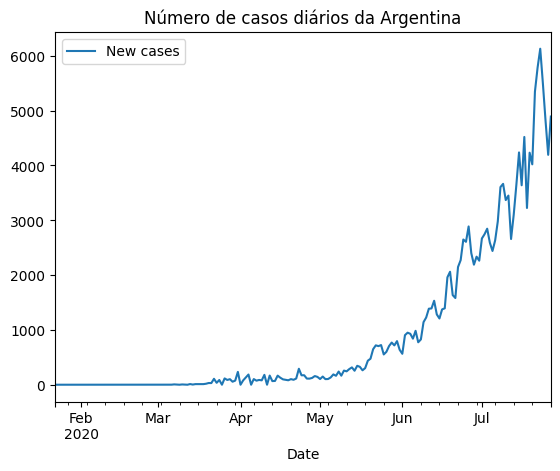

In [3]:
reg_data_ar = reg_data[reg_data['Country/Region'] == 'Argentina']
reg_data_ar = reg_data_ar[['New cases']]
reg_data_ar.plot()
plt.title('Número de casos diários da Argentina');

<AxesSubplot:xlabel='Date'>

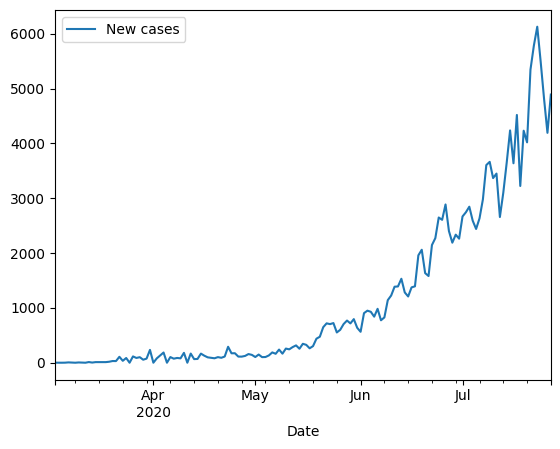

In [4]:
reg_data_ar = reg_data_ar.loc[reg_data_ar.ne(0).idxmax()[0]:]
reg_data_ar.plot()

In [5]:
train_data = reg_data_ar.iloc[:103]
test_data = reg_data_ar.iloc[103:]
print('Número de registros para treino final:', len(train_data))
print('Número de registros para teste final:', len(test_data))

Número de registros para treino final: 103
Número de registros para teste final: 44


In [6]:
model = ARIMAResults.load('D:/bootcamp-covid/model/arima_AR.pkl')
model


In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New cases   No. Observations:                  147
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -1596.947
Date:                Sat, 31 Dec 2022   AIC                           3203.893
Time:                        14:13:44   BIC                           3218.777
Sample:                    03-03-2020   HQIC                          3209.941
                         - 07-27-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3636      0.004    -86.655      0.000      -0.372      -0.355
ar.L2         -0.1571      0.007    -23.483      0.000      -0.170      -0.144
ar.L3         -0.0931      0.005    -19.426      0.000      -0.102      -0.084
ma.L1         -0.9296      0.003   -281.343      0.000      -0.936      -0.923
sigma2      7480.7451     71.228    105.025      0.000    7341.141    7620.349
===================================================================================
Ljung-Box (L1) (Q):                   2.41   Jarque-Bera (JB):               220.66
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):              62.00   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
model = model.apply(train_data)
model.summary()

C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New cases   No. Observations:                  103
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -595.272
Date:                Sat, 31 Dec 2022   AIC                           1200.545
Time:                        14:13:45   BIC                           1213.620
Sample:                    03-03-2020   HQIC                          1205.838
                         - 06-13-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3636      0.004    -86.655      0.000      -0.372      -0.355
ar.L2         -0.1571      0.007    -23.483      0.000      -0.170      -0.144
ar.L3         -0.0931      0.005    -19.426      0.000      -0.102      -0.084
ma.L1         -0.9296      0.003   -281.343      0.000      -0.936      -0.923
sigma2      7480.7451     71.228    105.025      0.000    7341.141    7620.349
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                15.06
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               4.09   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
model.params

ar.L1       -0.363601
ar.L2       -0.157097
ar.L3       -0.093065
ma.L1       -0.929628
sigma2    7480.745055
dtype: float64

In [10]:
model.fittedvalues

Date
2020-03-03       0.000000
2020-03-04       1.498835
2020-03-05      -0.965247
2020-03-06      -0.603754
2020-03-07       0.734956
                 ...     
2020-06-09     849.655758
2020-06-10    1081.287640
2020-06-11    1194.493128
2020-06-12    1352.355936
2020-06-13    1426.056197
Length: 103, dtype: float64

In [11]:
model.forecast(1)

2020-06-14    1541.725281
Freq: D, dtype: float64

In [12]:
model = model.apply(test_data)
model.summary()

C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New cases   No. Observations:                   44
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -981.516
Date:                Sat, 31 Dec 2022   AIC                           1973.033
Time:                        14:13:46   BIC                           1981.721
Sample:                    06-14-2020   HQIC                          1976.217
                         - 07-27-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3636      0.004    -86.655      0.000      -0.372      -0.355
ar.L2         -0.1571      0.007    -23.483      0.000      -0.170      -0.144
ar.L3         -0.0931      0.005    -19.426      0.000      -0.102      -0.084
ma.L1         -0.9296      0.003   -281.343      0.000      -0.936      -0.923
sigma2      7480.7451     71.228    105.025      0.000    7341.141    7620.349
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.36   Prob(JB):                         0.65
Heteroskedasticity (H):               5.60   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
model.params

ar.L1       -0.363601
ar.L2       -0.157097
ar.L3       -0.093065
ma.L1       -0.929628
sigma2    7480.745055
dtype: float64

In [14]:
model.forecast(1)

2020-07-28    4907.482944
Freq: D, dtype: float64